# 1 - Météo 

In [ ]:
# Installation de scrapy 
!pip install scrapy -q

     |████████████████████████████████| 264 kB 4.4 MB/s 
     |████████████████████████████████| 4.1 MB 67.4 MB/s 
     |████████████████████████████████| 251 kB 57.1 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 47 kB 4.4 MB/s 
     |████████████████████████████████| 3.1 MB 39.7 MB/s 
     |████████████████████████████████| 93 kB 1.9 MB/s 
     |████████████████████████████████| 74 kB 3.1 MB/s 


##1.1 Déterminer les coordonnées des villes 

In [ ]:
# Importation des bibliothèques necessaires pour le projet
import pandas as pd
from geopy.geocoders import Nominatim
import requests
from geopy.extra.rate_limiter import RateLimiter
import json
import re
import os 
import logging
import scrapy
from scrapy.crawler import CrawlerProcess
from scrapy.linkextractors import LinkExtractor
import re

In [ ]:
# Création d'une DataFrame des villes
locat = ["Mont Saint Michel",
"St Malo",
"Bayeux",
"Le Havre",
"Rouen",
"Paris",
"Amiens",
"Lille",
"Strasbourg",
"Chateau du Haut Koenigsbourg",
"Colmar",
"Eguisheim",
"Besancon",
"Dijon",
"Annecy",
"Grenoble",
"Lyon",
"Gorges du Verdon",
"Bormes les Mimosas",
"Cassis",
"Marseille",
"Aix en Provence",
"Avignon",
"Uzes",
"Nimes",
"Aigues Mortes",
"Saintes Maries de la mer",
"Collioure",
"Carcassonne",
"Ariege",
"Toulouse",
"Montauban",
"Biarritz",
"Bayonne",
"La Rochelle"]
df = pd.DataFrame({'add': locat})


In [ ]:
# Création une instance de Nominatim
geolocator = Nominatim(user_agent="my_request")
 
# Trouver les coordonnées pour les villes de DataFrame 
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df['location'] = df['add'].apply(geocode)
df['latitude'] = df['location'].apply(lambda x: x.latitude if x else None)
df['longitude'] = df['location'].apply(lambda x: x.longitude if x else None)
 
df.head(3)

,add,location,latitude,longitude
0,Mont Saint Michel,"(Mont Saint-Michel, Avancée des Bombardes, Le ...",48.635954,-1.511460
1,St Malo,"(Saint-Malo, Ille-et-Vilaine, Bretagne, France...",48.649518,-2.026041
2,Bayeux,"(Bayeux, Calvados, Normandie, France métropoli...",49.276462,-0.702474


In [ ]:
df1 = df.drop(['location'], axis=1)
df_coord_city =  df1 
df_coord_city.head()


,add,latitude,longitude
0,Mont Saint Michel,48.635954,-1.511460
1,St Malo,48.649518,-2.026041
2,Bayeux,49.276462,-0.702474
3,Le Havre,49.493898,0.107973
4,Rouen,49.440459,1.093966


In [ ]:
# Renommer la colonne add en villes
df_coord_city.rename({"add": "villes"}, axis='columns', inplace =True) 

In [ ]:
# Enregistrer les informations de DataFrame df_coord_city dans un fichier csv df_coord_city.csv
df_coord_city.to_csv(path_or_buf= 'df_coord_city.csv')

In [ ]:
# Lire le fichier csv (vérification)
df_coord_city = pd.read_csv('df_coord_city.csv',index_col=[0])
df_coord_city.head(3)

,villes,latitude,longitude
0,Mont Saint Michel,48.635954,-1.511460
1,St Malo,48.649518,-2.026041
2,Bayeux,49.276462,-0.702474


##1.2 La météo pour les coordonnées des villes

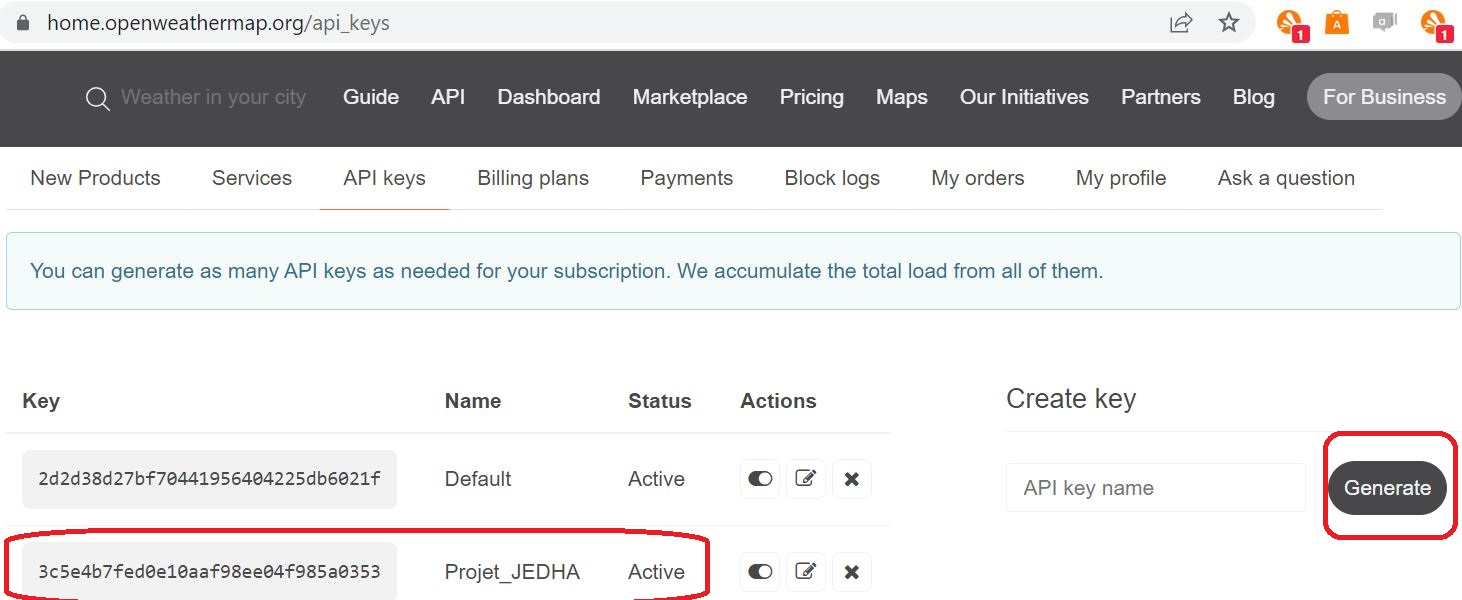

In [ ]:
# Extraire à partir de l'API openweathermap  les prébvisions méthéologiques pour les 7 jours 
df = pd.DataFrame(columns=['villes','latitude', 'longitude', 'jour', 'météo', 'temperature'])

for i in range(len(df_coord_city)): 
    r = requests.get("https://api.openweathermap.org/data/2.5/onecall?lat="+str(df_coord_city['latitude'][i])+"&lon="+str(df_coord_city['longitude'][i])+"&units=metric&exclude=current,minutely,hourly,alerts&appid=3c5e4b7fed0e10aaf98ee04f985a0353")
    rson=r.json()
    d={}
    for n in range(7):
        loc = df_coord_city['villes'][i]
        lat = df_coord_city['latitude'][i]
        lon = df_coord_city['longitude'][i]
        day = n+1
        météo =  rson['daily'][n]['weather'][0]['description']
        temperature = rson['daily'][n]['feels_like']['day']
        d = {'villes': loc, 'latitude': lat, 'longitude': lon,'jour': day, 'météo': météo, 'temperature':temperature}
        df = pd.concat([df, pd.DataFrame(d, index=[0])], ignore_index=True)
       
 

In [ ]:
df_prev_meteo = df
df_prev_meteo.head(5)

,villes,latitude,longitude,jour,météo,temperature
0,Mont Saint Michel,48.635954,-1.51146,1,few clouds,23.40
1,Mont Saint Michel,48.635954,-1.51146,2,clear sky,24.77
2,Mont Saint Michel,48.635954,-1.51146,3,overcast clouds,23.02
3,Mont Saint Michel,48.635954,-1.51146,4,scattered clouds,27.36
4,Mont Saint Michel,48.635954,-1.51146,5,broken clouds,25.64


In [ ]:
# Enregistrer le DataFrame dans un fichier csv df_prev_meteo
df_prev_meteo.to_csv(path_or_buf= 'df_prev_meteo.csv')